<a href="https://colab.research.google.com/github/Aishwarya254/Sign_language_to_text-/blob/main/extn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from tensorflow import keras


import cv2
import os
import string


In [7]:
vc = cv2.VideoCapture(0)

In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


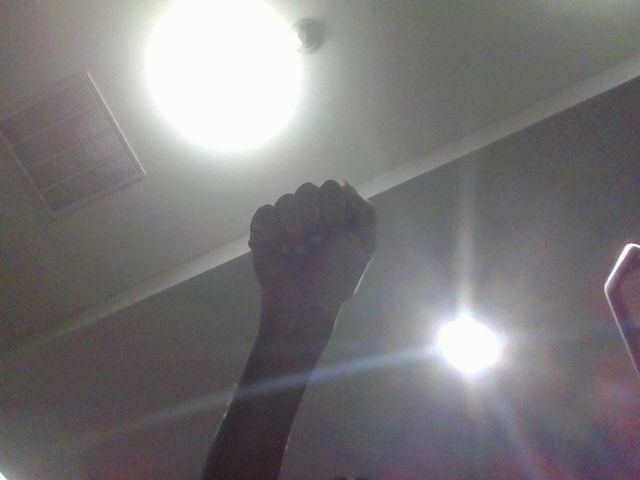

In [9]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from tensorflow import keras


import cv2
import os
import string
# Create the directory structure
if not os.path.exists("data"):
    os.makedirs("data")
if not os.path.exists("data/train"):
    os.makedirs("data/train")
if not os.path.exists("data/test"):
    os.makedirs("data/test")
for i in range(3):
    if not os.path.exists("data/train/" + str(i)):
        os.makedirs("data/train/"+str(i))
    if not os.path.exists("data/test/" + str(i)):
        os.makedirs("data/test/"+str(i))

for i in string.ascii_uppercase:
    if not os.path.exists("data/train/" + i):
        os.makedirs("data/train/"+i)
    if not os.path.exists("data/test/" + i):
        os.makedirs("data/test/"+i)
    


# Train or test 
mode = 'train'
directory = 'data/'+mode+'/'
minValue = 70

cap = cv2.VideoCapture(1)

while True:
    ret, frame = cap.read()
    print(ret)
    print(frame)
    dim=(20,20)
    frame = cv2.resize(frame,dim, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    #frame= [img for img in os.listdir(image_path) if img.endswith(".jpg")]
    #assert not isinstance(frame,type(None)), 'frame not found'
    img=cv2.imread(frame)
    print(img)
    try:
          img = cv2.resize(img, (1400, 1000), interpolation=cv2.INTER_AREA)
          print(img.shape)
    except:
        break
    height, width , layers = img.shape
    size=(width,height)
    print(size)
    cv2.imshow('Input', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

interrupt = -1  

while True:
    frame = cap.read()
    # Simulating mirror image
#    frame = cv2.flip(frame, 1)
    #assert not isinstance(frame,type(None)), 'frame not found'
    
    # Getting count of existing images
    count = {
             'zero': len(os.listdir(directory+"/0")),
             'one': len(os.listdir(directory+"/1")),
             'two': len(os.listdir(directory+"/2")),
    #          'three': len(os.listdir(directory+"/3")),
    #          'four': len(os.listdir(directory+"/4")),
    #          'five': len(os.listdir(directory+"/5")),
    #          'six': len(os.listdir(directory+"/6")),
             'a': len(os.listdir(directory+"/A")),
             'b': len(os.listdir(directory+"/B")),
             'c': len(os.listdir(directory+"/C")),
             'd': len(os.listdir(directory+"/D")),
             'e': len(os.listdir(directory+"/E")),
             'f': len(os.listdir(directory+"/F")),
             'g': len(os.listdir(directory+"/G")),
             'h': len(os.listdir(directory+"/H")),
             'i': len(os.listdir(directory+"/I")),
             'j': len(os.listdir(directory+"/J")),
             'k': len(os.listdir(directory+"/K")),
             'l': len(os.listdir(directory+"/L")),
             'm': len(os.listdir(directory+"/M")),
             'n': len(os.listdir(directory+"/N")),
             'o': len(os.listdir(directory+"/O")),
             'p': len(os.listdir(directory+"/P")),
             'q': len(os.listdir(directory+"/Q")),
             'r': len(os.listdir(directory+"/R")),
             's': len(os.listdir(directory+"/S")),
             't': len(os.listdir(directory+"/T")),
             'u': len(os.listdir(directory+"/U")),
             'v': len(os.listdir(directory+"/V")),
             'w': len(os.listdir(directory+"/W")),
             'x': len(os.listdir(directory+"/X")),
             'y': len(os.listdir(directory+"/Y")),
             'z': len(os.listdir(directory+"/Z"))
             }
    
    # Printing the count in each set to the screen
    # cv2.putText(frame, "MODE : "+mode, (10, 50), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    # cv2.putText(frame, "IMAGE COUNT", (10, ), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ZERO : "+str(count['zero']), (10, 70), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ONE : "+str(count['one']), (10, 80), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "TWO : "+str(count['two']), (10, 90), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    # cv2.putText(frame, "THREE : "+str(count['three']), (10, 180), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    # cv2.putText(frame, "FOUR : "+str(count['four']), (10, 200), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    # cv2.putText(frame, "FIVE : "+str(count['five']), (10, 220), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    # cv2.putText(frame, "SIX : "+str(count['six']), (10, 230), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "a : "+str(count['a']), (10, 100), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "b : "+str(count['b']), (10, 110), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "c : "+str(count['c']), (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "d : "+str(count['d']), (10, 130), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "e : "+str(count['e']), (10, 140), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "f : "+str(count['f']), (10, 150), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "g : "+str(count['g']), (10, 160), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "h : "+str(count['h']), (10, 170), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "i : "+str(count['i']), (10, 180), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "k : "+str(count['k']), (10, 190), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "l : "+str(count['l']), (10, 200), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "m : "+str(count['m']), (10, 210), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "n : "+str(count['n']), (10, 220), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "o : "+str(count['o']), (10, 230), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "p : "+str(count['p']), (10, 240), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "q : "+str(count['q']), (10, 250), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "r : "+str(count['r']), (10, 260), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "s : "+str(count['s']), (10, 270), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "t : "+str(count['t']), (10, 280), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "u : "+str(count['u']), (10, 290), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "v : "+str(count['v']), (10, 300), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "w : "+str(count['w']), (10, 310), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "x : "+str(count['x']), (10, 320), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "y : "+str(count['y']), (10, 330), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "z : "+str(count['z']), (10, 340), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (220-1, 9), (620+1, 419), (255,0,0) ,1)
    # Extracting the ROI
    roi = frame[10:410, 220:520]
#    roi = cv2.resize(roi, (64, 64))
    
    cv2.imshow("Frame", frame)
    assert not isinstance(frame,type(None)), 'frame not found'
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray,(5,5),2)
    # #blur = cv2.bilateralFilter(roi,9,75,75)
    
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, test_image = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #time.sleep(5)
    #cv2.imwrite("/home/rc/Downloads/soe/im1.jpg", roi)
    #test_image = func("/home/rc/Downloads/soe/im1.jpg")


    
    test_image = cv2.resize(test_image, (300,300))
    cv2.imshow("test", test_image)
        
    #_, mask = cv2.threshold(mask, 200, 255, cv2.THRESH_BINARY)
    #kernel = np.ones((1, 1), np.uint8)
    #img = cv2.dilate(mask, kernel, iterations=1)
    #img = cv2.erode(mask, kernel, iterations=1)
    # do the processing after capturing the image!
#    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#    _, roi = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
    
    ##gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    ##cv2.imshow("GrayScale", gray)
    ##blur = cv2.GaussianBlur(gray,(5,5),2)
    
    #blur = cv2.bilateralFilter(roi,9,75,75)
    
    ##th3 = cv2.adaptiveThreshold(frame,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ##ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # cv2.imshow("ROI", roi)
    #roi = frame
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
    if interrupt & 0xFF == ord('0'):
        cv2.imwrite(directory+'0/'+str(count['zero'])+'.jpg', roi)
    if interrupt & 0xFF == ord('1'):
        cv2.imwrite(directory+'1/'+str(count['one'])+'.jpg', roi)
    if interrupt & 0xFF == ord('2'):
        cv2.imwrite(directory+'2/'+str(count['two'])+'.jpg', roi)       
    # if interrupt & 0xFF == ord('3'):
    #     cv2.imwrite(directory+'3/'+str(count['three'])+'.jpg', roi)
    # if interrupt & 0xFF == ord('4'):
    #     cv2.imwrite(directory+'4/'+str(count['four'])+'.jpg', roi)
    # if interrupt & 0xFF == ord('5'):
    #     cv2.imwrite(directory+'5/'+str(count['five'])+'.jpg', roi)
    # if interrupt & 0xFF == ord('6'):
    #     cv2.imwrite(directory+'6/'+str(count['six'])+'.jpg', roi)
    if interrupt & 0xFF == ord('a'):
        cv2.imwrite(directory+'A/'+str(count['a'])+'.jpg', roi)
    if interrupt & 0xFF == ord('b'):
        cv2.imwrite(directory+'B/'+str(count['b'])+'.jpg', roi)
    if interrupt & 0xFF == ord('c'):
        cv2.imwrite(directory+'C/'+str(count['c'])+'.jpg', roi)
    if interrupt & 0xFF == ord('d'):
        cv2.imwrite(directory+'D/'+str(count['d'])+'.jpg', roi)
    if interrupt & 0xFF == ord('e'):
        cv2.imwrite(directory+'E/'+str(count['e'])+'.jpg', roi)
    if interrupt & 0xFF == ord('f'):
        cv2.imwrite(directory+'F/'+str(count['f'])+'.jpg', roi)
    if interrupt & 0xFF == ord('g'):
        cv2.imwrite(directory+'G/'+str(count['g'])+'.jpg', roi)
    if interrupt & 0xFF == ord('h'):
        cv2.imwrite(directory+'H/'+str(count['h'])+'.jpg', roi)
    if interrupt & 0xFF == ord('i'):
        cv2.imwrite(directory+'I/'+str(count['i'])+'.jpg', roi)
    if interrupt & 0xFF == ord('j'):
        cv2.imwrite(directory+'J/'+str(count['j'])+'.jpg', roi)
    if interrupt & 0xFF == ord('k'):
        cv2.imwrite(directory+'K/'+str(count['k'])+'.jpg', roi)
    if interrupt & 0xFF == ord('l'):
        cv2.imwrite(directory+'L/'+str(count['l'])+'.jpg', roi)
    if interrupt & 0xFF == ord('m'):
        cv2.imwrite(directory+'M/'+str(count['m'])+'.jpg', roi)
    if interrupt & 0xFF == ord('n'):
        cv2.imwrite(directory+'N/'+str(count['n'])+'.jpg', roi)
    if interrupt & 0xFF == ord('o'):
        cv2.imwrite(directory+'O/'+str(count['o'])+'.jpg', roi)
    if interrupt & 0xFF == ord('p'):
        cv2.imwrite(directory+'P/'+str(count['p'])+'.jpg', roi)
    if interrupt & 0xFF == ord('q'):
        cv2.imwrite(directory+'Q/'+str(count['q'])+'.jpg', roi)
    if interrupt & 0xFF == ord('r'):
        cv2.imwrite(directory+'R/'+str(count['r'])+'.jpg', roi)
    if interrupt & 0xFF == ord('s'):
        cv2.imwrite(directory+'S/'+str(count['s'])+'.jpg', roi)
    if interrupt & 0xFF == ord('t'):
        cv2.imwrite(directory+'T/'+str(count['t'])+'.jpg', roi)
    if interrupt & 0xFF == ord('u'):
        cv2.imwrite(directory+'U/'+str(count['u'])+'.jpg', roi)
    if interrupt & 0xFF == ord('v'):
        cv2.imwrite(directory+'V/'+str(count['v'])+'.jpg', roi)
    if interrupt & 0xFF == ord('w'):
        cv2.imwrite(directory+'W/'+str(count['w'])+'.jpg', roi)
    if interrupt & 0xFF == ord('x'):
        cv2.imwrite(directory+'X/'+str(count['x'])+'.jpg', roi)
    if interrupt & 0xFF == ord('y'):
        cv2.imwrite(directory+'Y/'+str(count['y'])+'.jpg', roi)
    if interrupt & 0xFF == ord('z'):
        cv2.imwrite(directory+'Z/'+str(count['z'])+'.jpg', roi)        
    
cap.release()
cv2.destroyAllWindows()
"""
d = "old-data/test/0"
newd = "data/test/0"
for walk in os.walk(d):
    for file in walk[2]:
        roi = cv2.imread(d+"/"+file)
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
        cv2.imwrite(newd+"/"+file, mask)     
"""

False
None


error: ignored